In [1]:
# importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
cash_requests_df = pd.read_csv("extract - cash request - data analyst.csv")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [4]:
cash_requests_df.shape

(23970, 16)

In [5]:
cash_requests_df.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [6]:
cash_requests_df.tail()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00,2021-02-06 20:17:49.292493+00,13681.0,NaN,NaN,2021-02-06 11:00:00+00,2020-10-13,2021-02-06 20:17:49.257521+00,instant,2020-10-12 13:54:24.352856+00,NaN,NaN,NaN
23966,25243,50.0,money_back,2020-10-27 14:41:25.73491+00,2020-12-18 13:15:40.843946+00,NaN,NaN,30367.0,2020-11-03 22:00:00+00,2020-10-28,2020-12-01 13:26:53.787672+00,instant,2020-10-27 14:41:57.901946+00,completed,2020-11-12 23:20:41.928788+00,2020-12-01 13:26:53.815504+00
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00,2021-02-05 12:19:30.656816+00,82122.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-21,2021-02-05 12:19:30.626289+00,instant,2020-10-20 07:58:14.171553+00,NaN,NaN,NaN
23968,20256,100.0,money_back,2020-10-10 05:40:55.700422+00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,2021-02-05 13:14:19.689906+00,instant,2020-10-10 05:41:23.368363+00,NaN,NaN,NaN
23969,19886,100.0,direct_debit_sent,2020-10-08 14:16:52.155661+00,2021-01-05 15:45:52.645536+00,44867.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-10,NaN,instant,2020-10-08 14:17:04.526139+00,NaN,NaN,NaN


In [7]:
cash_requests_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

# Data Cleaning

In [8]:
# List of columns to convert to datetime format
date_columns = [
    'created_at', 'updated_at', 'reimbursement_date',
    'cash_request_received_date', 'money_back_date',
    'send_at', 'reco_creation', 'reco_last_update'
]

# Convert all columns to datetime format.
for col in date_columns:
    cash_requests_df[col] = pd.to_datetime(cash_requests_df[col], errors='coerce')


In [9]:
cash_requests_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          23970 non-null  int64              
 1   amount                      23970 non-null  float64            
 2   status                      23970 non-null  object             
 3   created_at                  23970 non-null  datetime64[ns, UTC]
 4   updated_at                  23970 non-null  datetime64[ns, UTC]
 5   user_id                     21867 non-null  float64            
 6   moderated_at                16035 non-null  object             
 7   deleted_account_id          2104 non-null   float64            
 8   reimbursement_date          3050 non-null   datetime64[ns, UTC]
 9   cash_request_received_date  16289 non-null  datetime64[ns]     
 10  money_back_date             12040 non-null  datetime64[ns,

In [10]:
# I display the number of null values for each column
cash_requests_df.isnull().sum()

id                                0
amount                            0
status                            0
created_at                        0
updated_at                        0
user_id                        2103
moderated_at                   7935
deleted_account_id            21866
reimbursement_date            20920
cash_request_received_date     7681
money_back_date               11930
transfer_type                     0
send_at                        7504
recovery_status               20640
reco_creation                 20640
reco_last_update              20640
dtype: int64

In [11]:
# Display a sample of non-zero values for columns
cash_requests_df['deleted_account_id'].dropna().sample(5)
cash_requests_df['reimbursement_date'].dropna().sample(5)
cash_requests_df['recovery_status'].dropna().sample(5)
cash_requests_df['reco_creation'].dropna().sample(5)

#I decided to keep these null values, because the columns will be useful for analysis


11573   2020-07-03 22:27:48.492507+00:00
8954    2020-12-09 22:09:59.142913+00:00
23415   2020-11-22 22:41:36.281841+00:00
10193   2020-11-18 22:30:09.454089+00:00
16318   2020-09-11 23:03:22.938581+00:00
Name: reco_creation, dtype: datetime64[ns, UTC]

In [12]:
# Replace null values in the columns
cash_requests_df['recovery_status'] = cash_requests_df['recovery_status'].fillna("No Incident")
cash_requests_df['deleted_account_id'] = cash_requests_df['deleted_account_id'].fillna("Active")
cash_requests_df['user_id'] = cash_requests_df['user_id'].fillna("Deleted")

In [13]:
cash_requests_df.sample(3)


,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
8921,25201,50.0,rejected,2020-10-27 13:23:36.207454+00:00,2020-10-27 18:03:33.876062+00:00,88848.0,2020-10-27 18:03:33.867329+00,Active,NaT,NaT,NaT,instant,2020-10-27 13:23:48.687056+00:00,No Incident,NaT,NaT
5598,16441,50.0,rejected,2020-09-16 13:09:56.400734+00:00,2020-09-16 13:26:28.885048+00:00,26006.0,2020-09-16 13:26:28.87737+00,Active,NaT,NaT,NaT,regular,2020-09-23 13:09:56.353718+00:00,No Incident,NaT,NaT
18213,19727,100.0,money_back,2020-10-07 21:15:35.732135+00:00,2020-12-18 13:11:34.808274+00:00,27411.0,NaN,Active,NaT,2020-10-08,2020-12-02 19:26:52.244972+00:00,instant,2020-10-07 21:19:32.121571+00:00,No Incident,NaT,NaT


Number of Users per Cohort

In [14]:
# Create the column “cohort_month” by extracting the year and month from the column 'created_at'
cash_requests_df['cohort_month'] = cash_requests_df['created_at'].dt.to_period('M')


C:\Users\somoy\AppData\Local\Temp\ipykernel_30628\2341253658.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash_requests_df['cohort_month'] = cash_requests_df['created_at'].dt.to_period('M')


In [15]:
cash_requests_df.sample(5)

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,cohort_month
1662,3730,100.0,rejected,2020-06-17 19:26:23.286555+00:00,2020-06-18 11:18:24.798170+00:00,13049.0,2020-06-18 11:18:24.793422+00,Active,NaT,NaT,NaT,regular,NaT,No Incident,NaT,NaT,2020-06
13246,9979,100.0,money_back,2020-07-29 09:55:55.972699+00:00,2020-12-18 13:09:43.472603+00:00,Deleted,2020-07-29 10:32:57.892227+00,17234.0,NaT,2020-07-30,NaT,regular,2020-08-05 09:55:55.971835+00:00,No Incident,NaT,NaT,2020-07
17840,19305,100.0,money_back,2020-10-05 16:27:47.697975+00:00,2020-12-18 13:11:26.259671+00:00,57476.0,2020-10-05 16:57:31.477302+00,Active,NaT,2020-10-06,2020-11-02 23:24:30.723809+00:00,instant,2020-10-12 16:27:47.661853+00:00,No Incident,NaT,NaT,2020-10
79,1245,100.0,money_back,2020-04-16 20:11:32.037721+00:00,2020-05-01 22:00:08.355612+00:00,6613.0,2020-04-17 08:50:34.554916+00,Active,2020-04-23 20:11:32.037054+00:00,2020-04-20,2020-05-01 22:00:08.353852+00:00,regular,NaT,No Incident,NaT,NaT,2020-04
19045,25966,100.0,money_back,2020-10-29 08:32:55.028884+00:00,2020-12-18 13:11:56.306908+00:00,97124.0,NaN,Active,NaT,2020-10-30,2020-11-03 11:56:47.835219+00:00,instant,2020-10-29 08:33:16.154582+00:00,No Incident,NaT,NaT,2020-10


In [16]:
# Calculate the number of unique users for each “cohort_month”
cohort_counts = cash_requests_df.groupby('cohort_month')['user_id'].nunique()


cohort_counts

# we see months where the service is used more and months where it is used less, we can think about calculating the frequency of service use

cohort_month
2019-11       1
2019-12     206
2020-01     160
2020-02     148
2020-03     184
2020-04     370
2020-05     637
2020-06    1836
2020-07    2419
2020-08    2385
2020-09    3324
2020-10    7004
2020-11     138
Freq: M, Name: user_id, dtype: int64

Frequency of service usage

In [17]:
#Creating the usage_month column to see the month of usage based on the send_at column
cash_requests_df['usage_month'] = cash_requests_df['send_at'].dt.to_period('M')

cash_requests_df.head()

C:\Users\somoy\AppData\Local\Temp\ipykernel_30628\2337826440.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash_requests_df['usage_month'] = cash_requests_df['send_at'].dt.to_period('M')


,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,cohort_month,usage_month
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.407830+00:00,804.0,2019-12-11 16:47:42.405646+00,Active,2020-01-09 19:05:21.596363+00:00,NaT,NaT,regular,NaT,No Incident,NaT,NaT,2019-12,NaT
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00:00,231.0,2019-12-11 14:24:22.897988+00,Active,2020-01-09 19:50:12.347780+00:00,NaT,NaT,regular,NaT,No Incident,NaT,NaT,2019-12,NaT
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00:00,191.0,2019-12-11 09:46:59.777728+00,Active,2020-01-09 19:13:35.825041+00:00,NaT,NaT,regular,NaT,No Incident,NaT,NaT,2019-12,NaT
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00:00,761.0,2019-12-18 14:26:18.128407+00,Active,2020-01-09 19:16:10.879606+00:00,NaT,NaT,regular,NaT,No Incident,NaT,NaT,2019-12,NaT
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.340080+00:00,7686.0,2020-05-07 09:21:55.320193+00,Active,NaT,NaT,NaT,regular,NaT,No Incident,NaT,NaT,2020-05,NaT


In [18]:
# Filter the DataFrame to keep only rows where 'send_at' is not null
filtered_df = cash_requests_df[~cash_requests_df['send_at'].isnull()]
filtered_df

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,cohort_month,usage_month
48,23534,25.0,money_back,2020-10-23 15:20:26.163927+00:00,2020-12-18 13:08:29.099365+00:00,21465.0,NaN,Active,NaT,NaT,2020-11-06 07:16:21.845479+00:00,instant,2020-10-23 15:21:26.878525+00:00,No Incident,NaT,NaT,2020-10,2020-10
55,9323,50.0,rejected,2020-07-21 21:33:12.430494+00:00,2020-07-22 08:59:33.989211+00:00,23318.0,2020-07-22 08:59:33.986846+00,Active,NaT,NaT,NaT,regular,2020-07-28 21:33:12.430087+00:00,No Incident,NaT,NaT,2020-07,2020-07
60,18701,100.0,rejected,2020-10-01 11:41:07.208207+00:00,2020-10-01 12:26:23.482538+00:00,57285.0,2020-10-01 12:26:23.47496+00,Active,NaT,NaT,NaT,regular,2020-10-08 11:41:07.170136+00:00,No Incident,NaT,NaT,2020-10,2020-10
62,16121,50.0,rejected,2020-09-14 23:05:32.606904+00:00,2020-09-15 08:16:28.688342+00:00,38075.0,2020-09-15 08:16:28.681129+00,Active,NaT,NaT,NaT,instant,2020-09-21 23:05:32.558375+00:00,No Incident,NaT,NaT,2020-09,2020-09
135,18459,100.0,rejected,2020-09-29 18:36:25.875659+00:00,2020-09-30 07:51:52.005581+00:00,55584.0,2020-09-30 07:51:51.997203+00,Active,NaT,NaT,NaT,instant,2020-10-06 18:36:25.849957+00:00,No Incident,NaT,NaT,2020-09,2020-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00:00,2021-02-06 20:17:49.292493+00:00,13681.0,NaN,Active,NaT,2020-10-13,2021-02-06 20:17:49.257521+00:00,instant,2020-10-12 13:54:24.352856+00:00,No Incident,NaT,NaT,2020-10,2020-10
23966,25243,50.0,money_back,2020-10-27 14:41:25.734910+00:00,2020-12-18 13:15:40.843946+00:00,Deleted,NaN,30367.0,NaT,2020-10-28,2020-12-01 13:26:53.787672+00:00,instant,2020-10-27 14:41:57.901946+00:00,completed,2020-11-12 23:20:41.928788+00:00,2020-12-01 13:26:53.815504+00:00,2020-10,2020-10
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00:00,2021-02-05 12:19:30.656816+00:00,82122.0,NaN,Active,NaT,2020-10-21,2021-02-05 12:19:30.626289+00:00,instant,2020-10-20 07:58:14.171553+00:00,No Incident,NaT,NaT,2020-10,2020-10
23968,20256,100.0,money_back,2020-10-10 05:40:55.700422+00:00,2021-02-05 13:14:19.707627+00:00,64517.0,NaN,Active,NaT,2020-10-12,2021-02-05 13:14:19.689906+00:00,instant,2020-10-10 05:41:23.368363+00:00,No Incident,NaT,NaT,2020-10,2020-10


In [19]:
cohort_use = filtered_df.groupby(['cohort_month', 'usage_month'])['user_id'].nunique()
cohort_use.to_csv("frequency_use.csv")
cohort_use

cohort_month  usage_month
2020-07       2020-07         360
              2020-08         498
2020-08       2020-08        2151
              2020-09         272
2020-09       2020-09        2190
              2020-10        1212
2020-10       2020-10        6866
              2020-11         149
2020-11       2020-11         138
Name: user_id, dtype: int64

In [20]:
# Create the pivot table to display the user count
cohort_pivot = cohort_use.unstack(level='usage_month')

# View the pivot table
cohort_pivot


usage_month,2020-07,2020-08,2020-09,2020-10,2020-11
cohort_month,,,,,
2020-07,360.0,498.0,NaN,NaN,NaN
2020-08,NaN,2151.0,272.0,NaN,NaN
2020-09,NaN,NaN,2190.0,1212.0,NaN
2020-10,NaN,NaN,NaN,6866.0,149.0
2020-11,NaN,NaN,NaN,NaN,138.0


Incident Rate

<Figure size 1200x800 with 0 Axes>

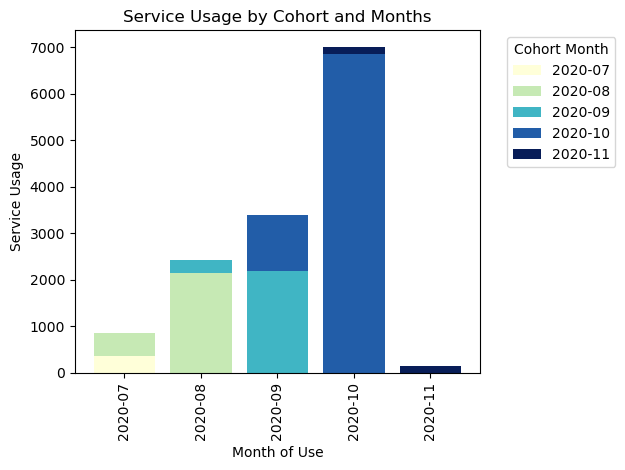

In [22]:
#for creating a bar chart from cohort_pivot
plt.figure(figsize=(12, 8))

# If cohort_pivot is a pivot table, you can plot it as a grouped bar chart
cohort_pivot.plot(kind='bar', stacked=True, cmap='YlGnBu', width=0.8)

plt.title('Service Usage by Cohort and Months')
plt.xlabel('Month of Use')
plt.ylabel('Service Usage')

plt.legend(title='Cohort Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

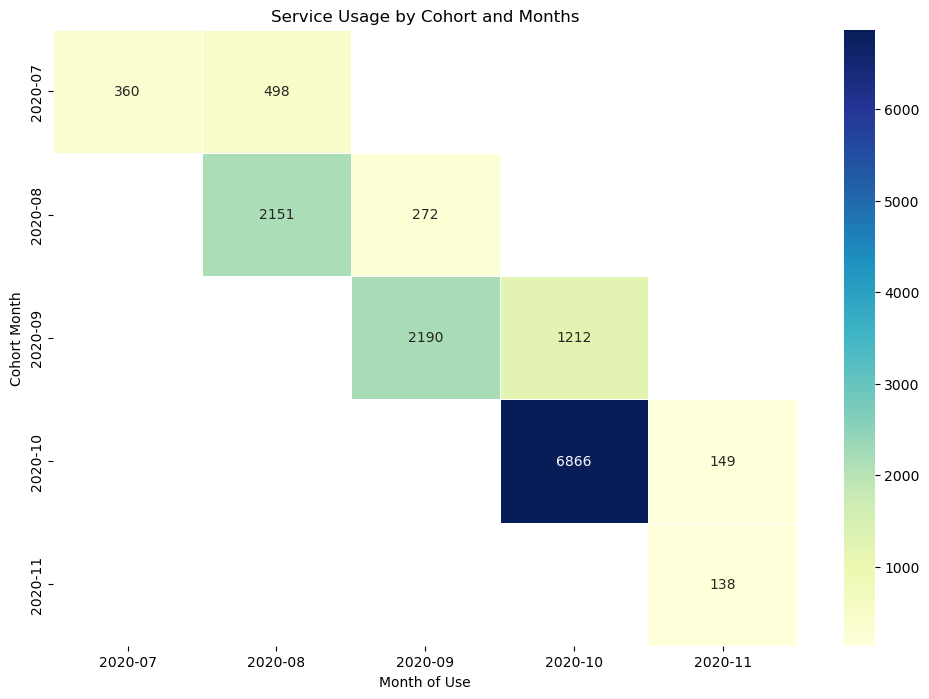

In [21]:
plt.figure(figsize=(12, 8))

sns.heatmap(cohort_pivot, cmap="YlGnBu", annot=True, fmt='g', linewidths=.5)

plt.title('Service Usage by Cohort and Months')
plt.xlabel('Month of Use')
plt.ylabel('Cohort Month')

plt.show()

In [23]:
count_status = filtered_df.groupby(['cohort_month', 'recovery_status'])['user_id'].nunique()
count_status

cohort_month  recovery_status     
2020-07       No Incident              733
              completed                 79
              pending                   21
2020-08       No Incident             2003
              completed                294
              pending                   89
              pending_direct_debit       4
2020-09       No Incident             2799
              completed                412
              pending                  134
              pending_direct_debit       4
2020-10       No Incident             5842
              completed                861
              pending                  358
              pending_direct_debit       5
2020-11       No Incident              110
              completed                 20
              pending                    8
Name: user_id, dtype: int64

In [24]:
# calculation of unique users per cohort
count_cohort = filtered_df.groupby(['cohort_month'])['user_id'].nunique()
count_cohort

cohort_month
2020-07     818
2020-08    2314
2020-09    3284
2020-10    6985
2020-11     138
Freq: M, Name: user_id, dtype: int64

In [25]:
# Filter users who have had an incident
incident_users = filtered_df[filtered_df['recovery_status'].isin(['completed', 'pending', 'pending_direct_debit'])]

# Count the number of users with incidents for each cohort
count_incident = incident_users.groupby('cohort_month')['user_id'].nunique()

count_incident


cohort_month
2020-07      99
2020-08     386
2020-09     549
2020-10    1222
2020-11      28
Freq: M, Name: user_id, dtype: int64

In [26]:
# calculation of incident rate
incident_rate = count_incident/count_cohort

incident_rate

cohort_month
2020-07    0.121027
2020-08    0.166811
2020-09    0.167174
2020-10    0.174946
2020-11    0.202899
Freq: M, Name: user_id, dtype: float64

Service Stability: A low incident rate could indicate that the service is operating stably and problems are rare.

Effectiveness of Incident Management: If the rate remains low even in more recent cohorts, it could mean that incident management is effective.

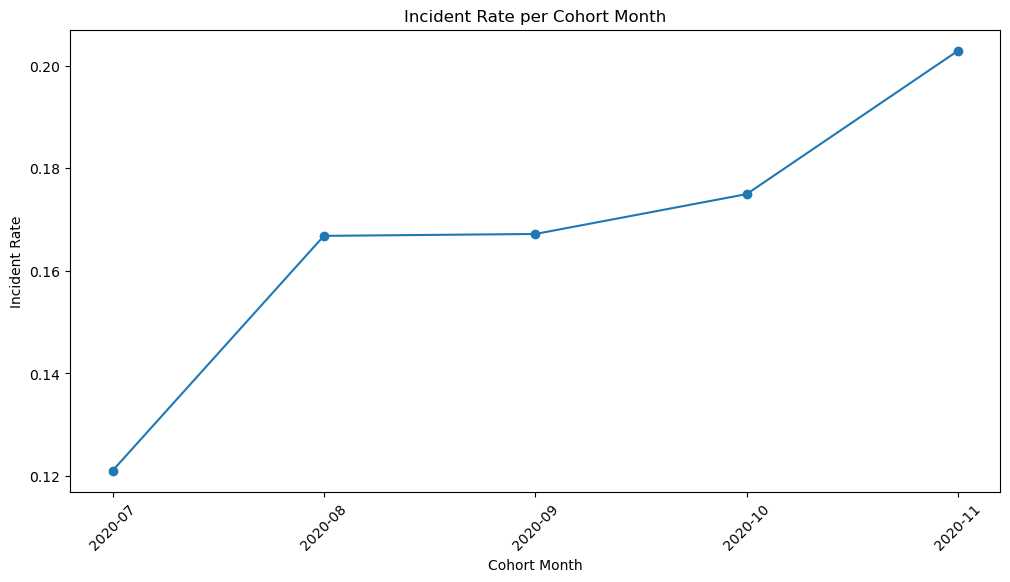

In [27]:
# chart creation by incident rate

# Convert index to strings
incident_rate.index = incident_rate.index.astype(str)

plt.figure(figsize=(12, 6))
plt.plot(incident_rate.index, incident_rate.values, marker='o')

plt.title('Incident Rate per Cohort Month')
plt.xlabel('Cohort Month')
plt.ylabel('Incident Rate')

plt.xticks(rotation=45)

plt.show()

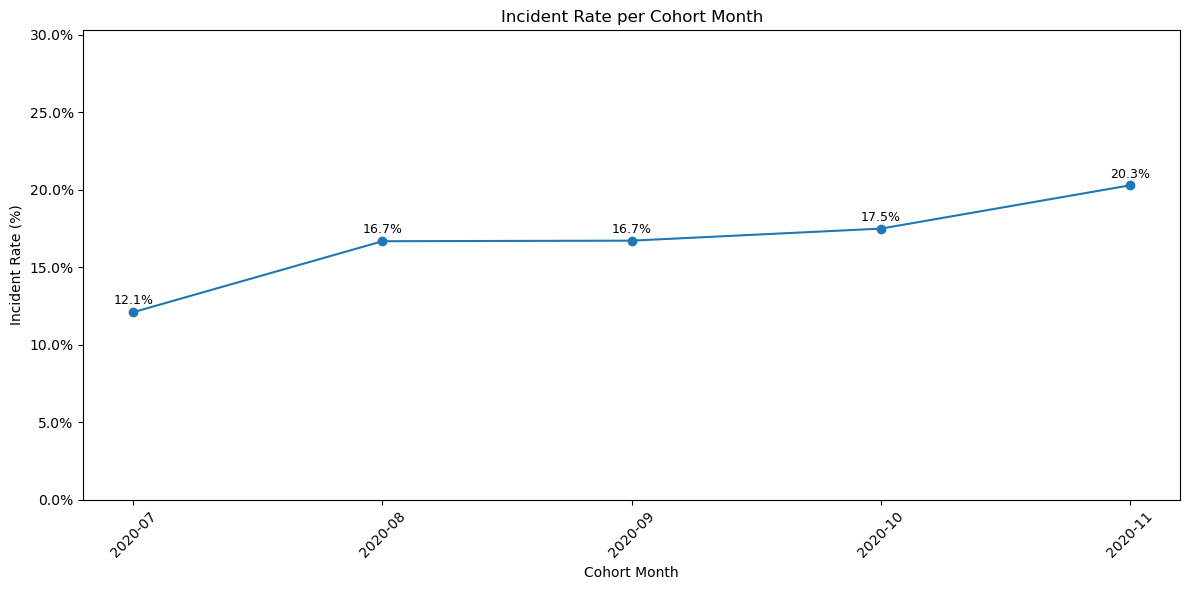

<Figure size 640x480 with 0 Axes>

In [34]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

plt.figure(figsize=(12, 6))

# Multiply the values by 100 to convert to percentage
incident_rate_percent = incident_rate.values * 100

# Plot the incident rate
plt.plot(incident_rate.index, incident_rate_percent, marker='o')

# Title and labels
plt.title('Incident Rate per Cohort Month')
plt.xlabel('Cohort Month')
plt.ylabel('Incident Rate (%)')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Format the y-axis as percentages and set the limits to start from 0
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())
plt.ylim(0, max(incident_rate_percent) + 10)  # Set y-axis to start from 0%

# Label each data point with its percentage value
for i, value in enumerate(incident_rate_percent):
    plt.text(incident_rate.index[i], value + 0.5, f'{value:.1f}%', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

Significantly, although the incident rate is going up, it still remains relatively low.

## Conclusions

### Frequency of Service Usage
- Analysis of frequency of use showed a significant peak in August, September, and October 2020.
- After the peak, there was a sharp drop in November, suggesting a possible change in user behavior or a specific event.

### Incident Rate
- The accident rate remained generally low, indicating a good level of service stability.
- However, an increasing trend has been observed in more recent months, suggesting the need to monitor any emerging problems.
